<h1>Links to Resources</h1>

In [37]:
# https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes
# https://www.kaggle.com/learn/intro-to-machine-learning
# https://seaborn.pydata.org/generated/seaborn.pairplot.html

<h1>Libraries</h1>

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib as mpl
import matplotlib.colors as mcolors
from matplotlib import colors
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score

<h1>First 5 Rows of Table</h1>

In [39]:
# opening file, need to use \\ since python sees one \ as escape char
df = pd.read_csv("CleanedDataset.csv")
# prints first 5 rows
df.head()

# prints description of all column labels
#df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,130,70,13,105,25.9,0.472,22,0
1,1,92,62,25,41,19.5,0.482,25,0
2,1,92,62,25,41,19.5,0.482,25,0
3,1,92,62,25,41,19.5,0.482,25,0
4,1,92,62,25,41,19.5,0.482,25,0


<h1>Print Rows and Columns from csv File, Print Type of Data from Each Column</h1>

In [40]:
print('Rows, Cols:', df.shape, '\n')
print('Types of Data:', end = '\n')
print(df.dtypes)

Rows, Cols: (756, 9) 

Types of Data:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


<h1>Histograms</h1>

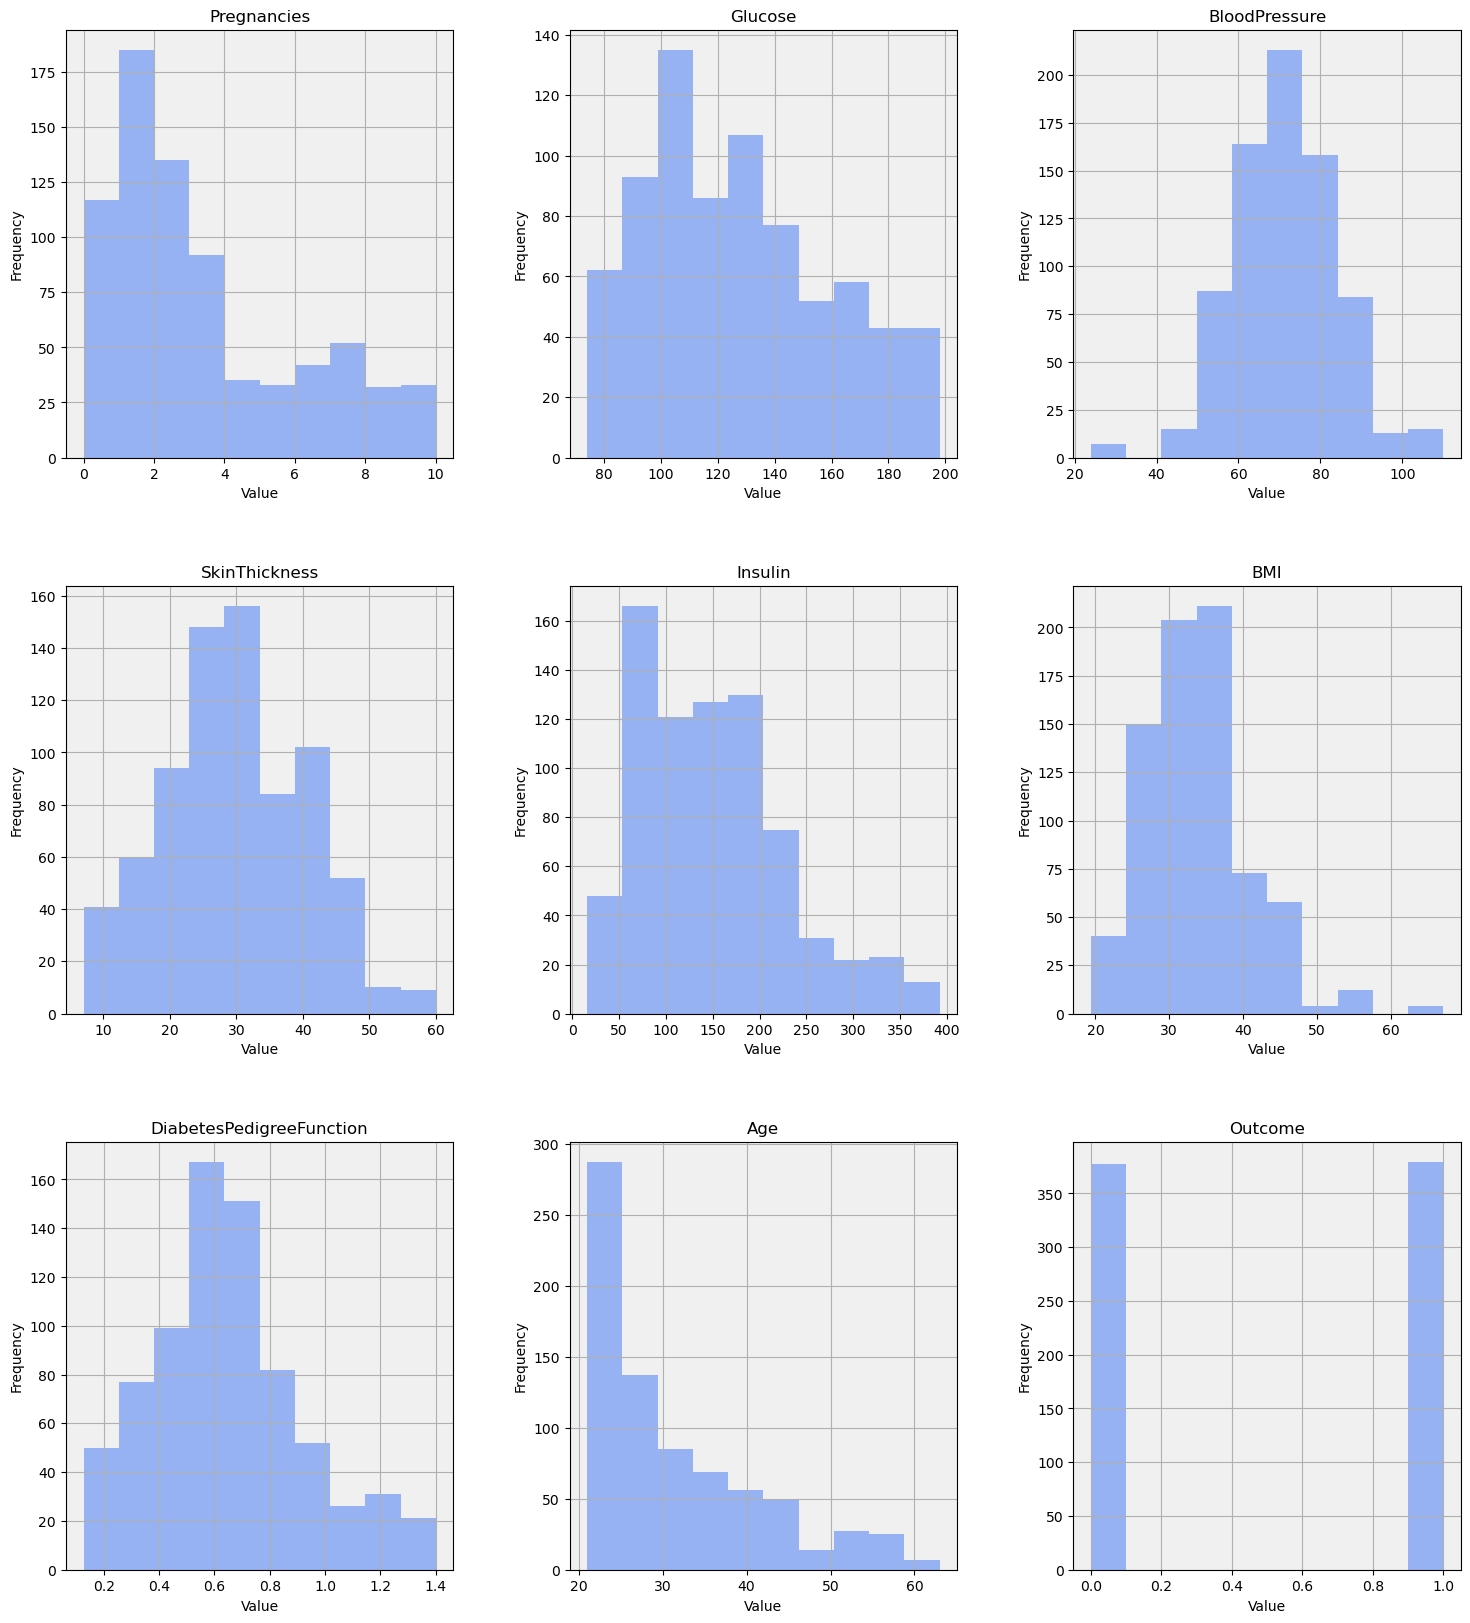

In [41]:
# creating histograms
histogram = df.hist(figsize=(18,20), color = '#96b2f2')

for ax in histogram.flatten():
    # setting background color for each histogram
    ax.set_facecolor('#f0f0f0')

    # labeling all x/y axes
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

    # labeling all titles
    ax.set_title(ax.get_title())

# printing all graphs
plt.show()

<h1> Detailed Graph of the correlation between each of the parameters</h1>

c:\Users\brita\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\brita\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\brita\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\brita\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

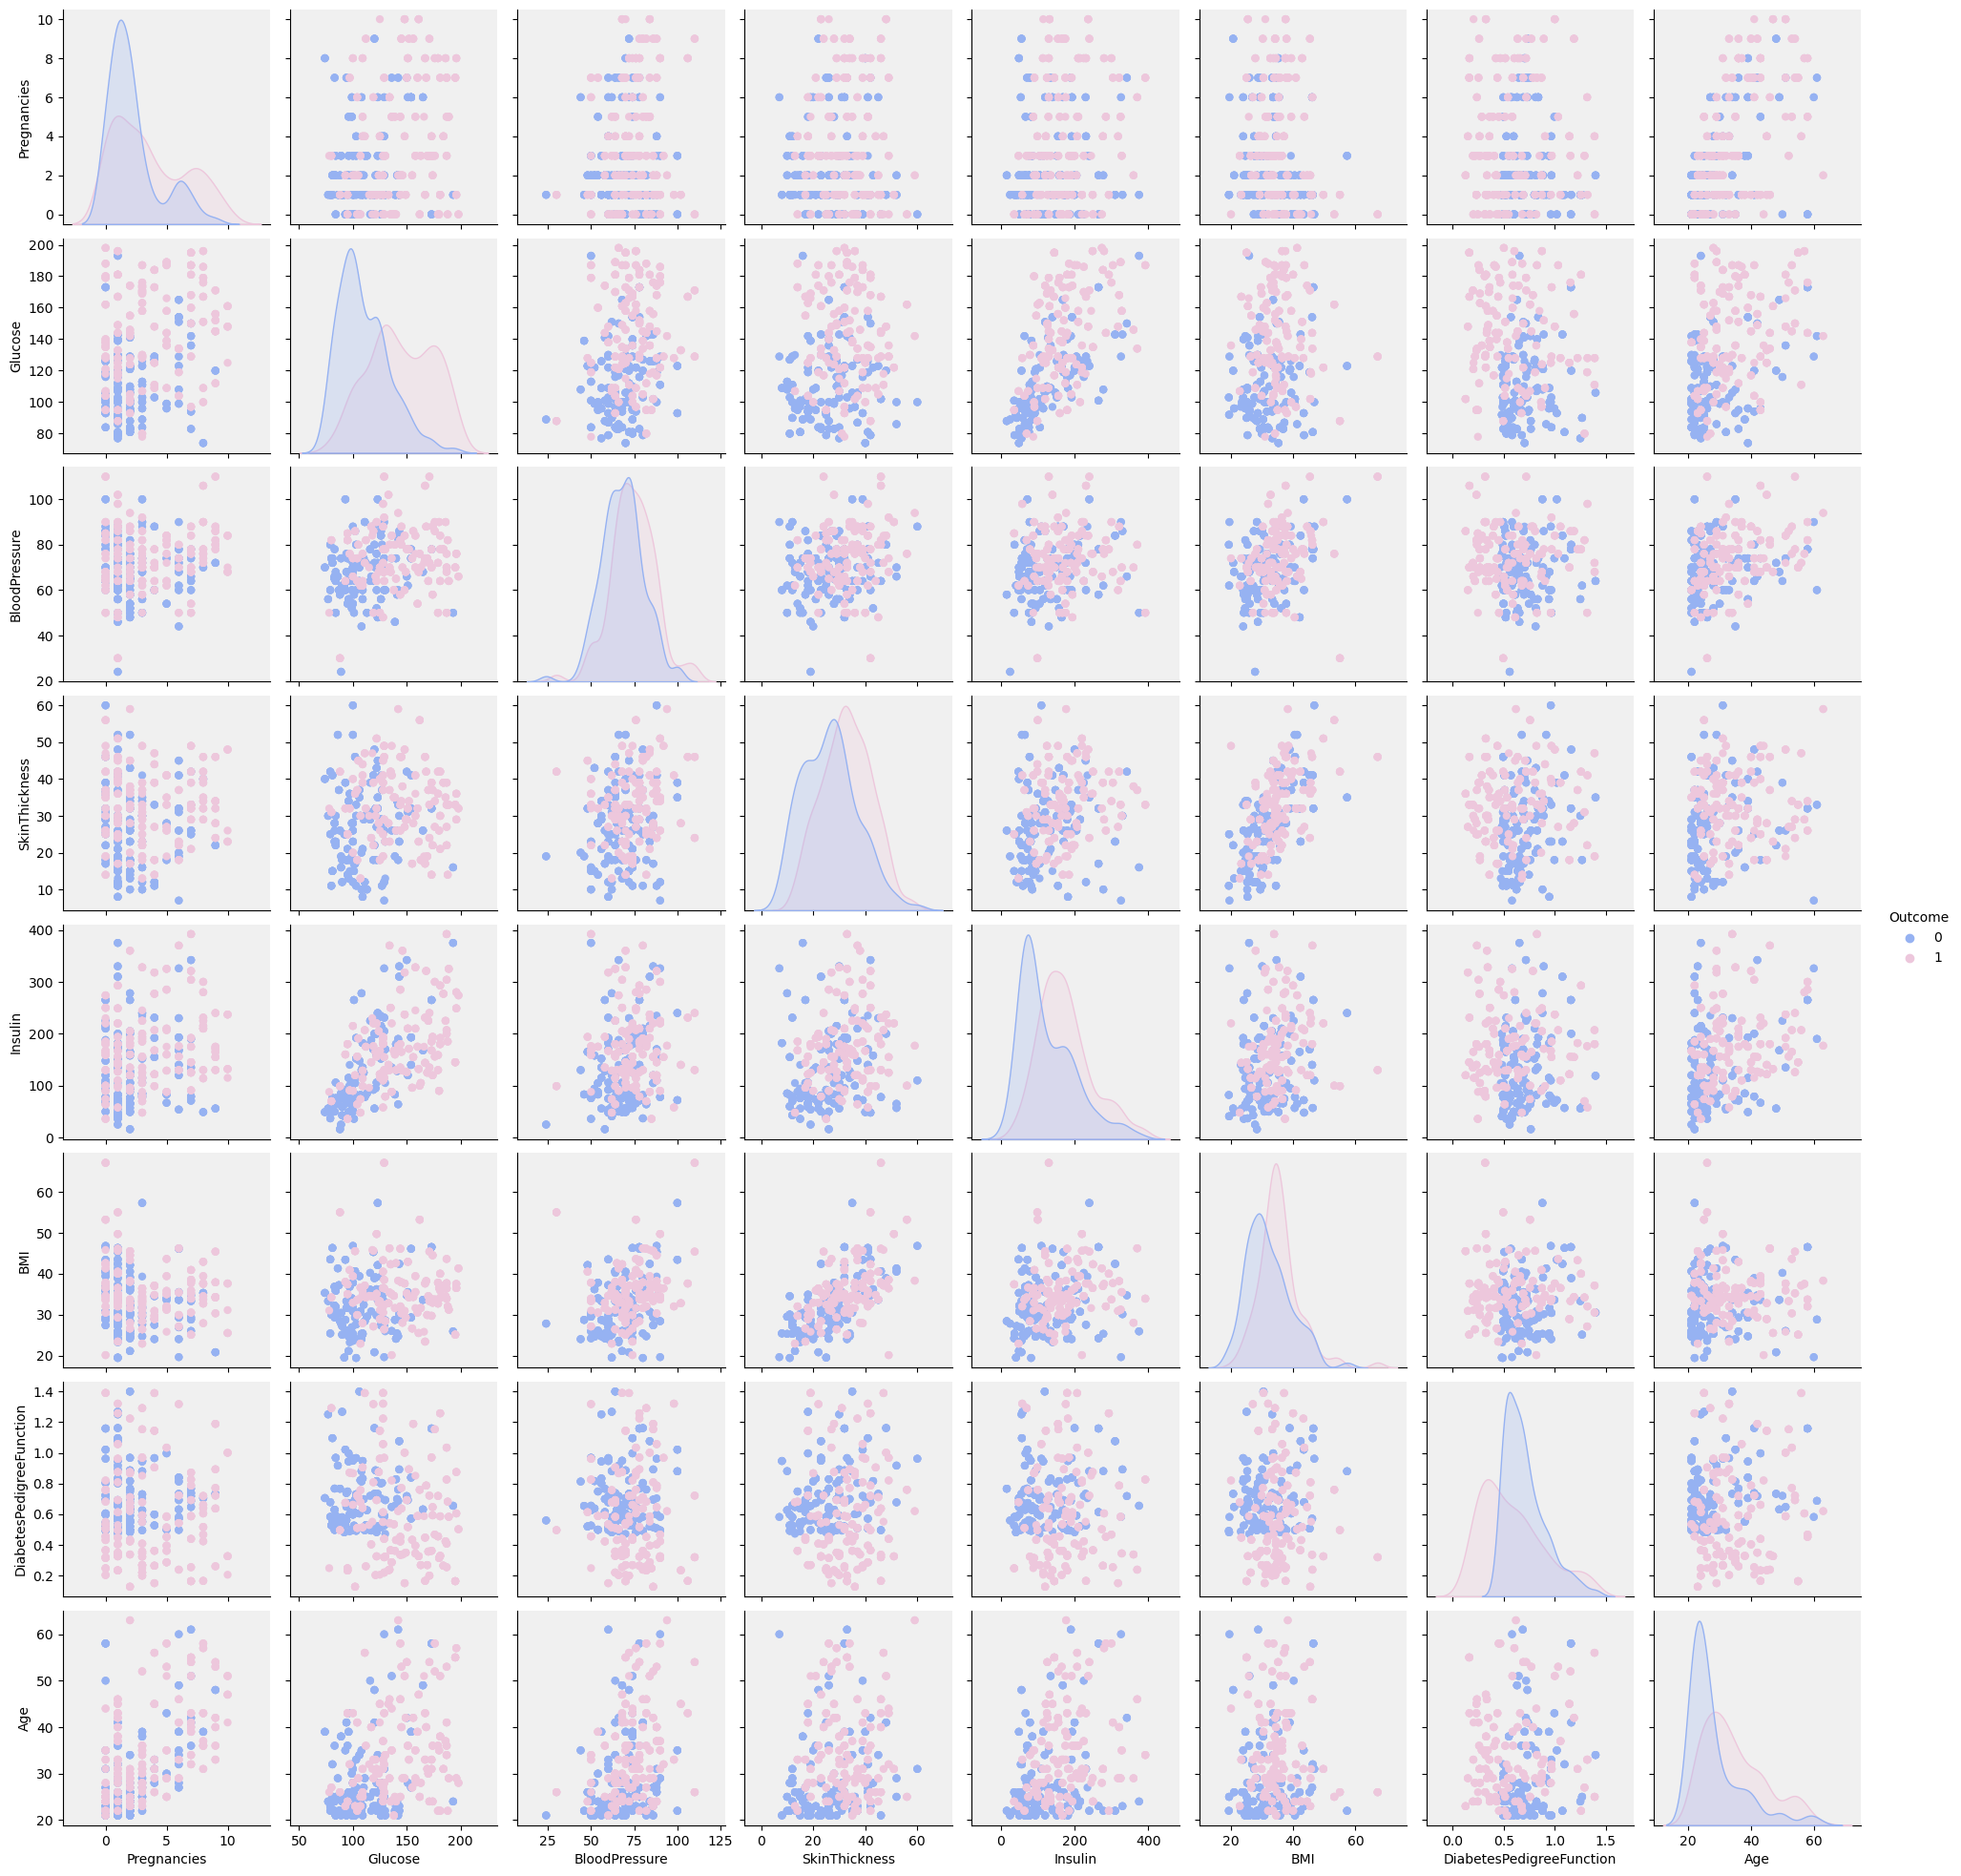

In [52]:
# palette for legend (editable)
myPalette = [ "#96b2f2", "#edc7dc"]

# creating actual plots
# change 'pastel' to myPalette if using custom palette above
myPlot = sns.pairplot(df, hue = 'Outcome', palette = myPalette)

# setting background color of each graph
background_color = '#f0f0f0'

for ax in myPlot.axes.flatten():
    ax.set_facecolor(background_color)

# removing all white edges on scatter plot points
for ax in myPlot.axes.flat:
    for collection in ax.collections:
        collection.set_edgecolor("None")

# printing all graphs
plt.show()

<h1> Cross Validation Test </h1>

In [43]:
# Prepare features and target variable
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Define range of max_depth values to test
max_depth_range = range(1, 21)

# Initialize dictionary to store the mean cross-validation scores for each max_depth
mean_scores = {}

# Perform cross-validation for each max_depth
for depth in max_depth_range:
    model = DecisionTreeClassifier(max_depth = depth)
    scores = cross_val_score(model, X, y, cv = 5)
    mean_scores[depth] = scores.mean()

# Find the max_depth with the best mean cross-validation score
best_depth = max(mean_scores, key = mean_scores.get)

# Print the results
# best_depth, best_score
print(f"Best max_depth                  : {best_depth}")

Best max_depth                  : 1


<h1>Accuracy Test</h1>

Training Accuracy  : 0.7235099337748344
Testing Accuracy   : 0.7302631578947368
Training Class Report:
               precision    recall  f1-score   support

           0       0.65      1.00      0.79       306
           1       1.00      0.44      0.61       298

    accuracy                           0.72       604
   macro avg       0.82      0.72      0.70       604
weighted avg       0.82      0.72      0.70       604

Testing Class Report:
               precision    recall  f1-score   support

           0       0.63      1.00      0.78        71
           1       1.00      0.49      0.66        81

    accuracy                           0.73       152
   macro avg       0.82      0.75      0.72       152
weighted avg       0.83      0.73      0.71       152



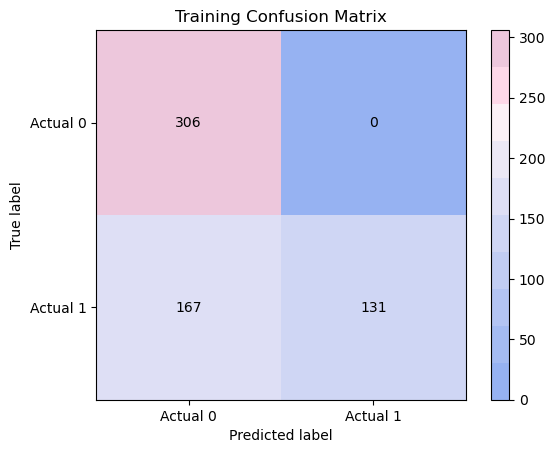

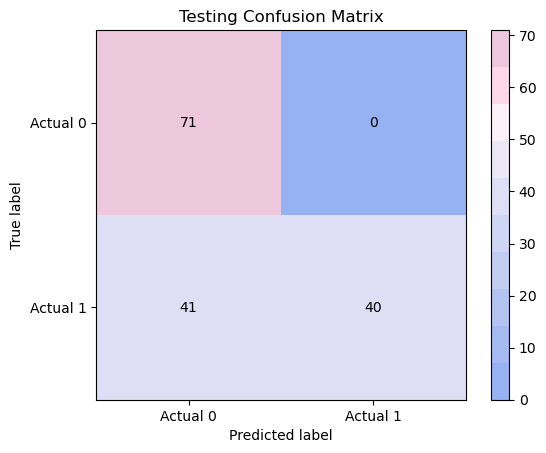

In [44]:
diabetes_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
y = df.Outcome
X = df[diabetes_features]

# Color palette 
myPalette2 = [
    "#96b2f2", "#a4bbf2", "#b3c4f3", "#c1cdf3", "#cfd6f4",
    "#dedff5", "#ece8f5", "#fbf1f6", "#fdd8e8", "#edc7dc"
]

# Splitting the data with a more typical test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

# Initializing the Decision Tree model with max depth to prevent overfitting
diabetes_model = DecisionTreeClassifier(max_depth = 1, random_state = 3)

# Training the model
diabetes_model.fit(X_train, y_train)

# Making predictions
train_predictions = diabetes_model.predict(X_train)
test_predictions = diabetes_model.predict(X_test)

# Evaluating the model on the training data
train_accuracy = accuracy_score(y_train, train_predictions)
train_conf_matrix = confusion_matrix(y_train, train_predictions)
train_class_report = classification_report(y_train, train_predictions)

# Evaluating the model on the testing data
test_accuracy = accuracy_score(y_test, test_predictions)
test_conf_matrix = confusion_matrix(y_test, test_predictions)
test_class_report = classification_report(y_test, test_predictions)

# Printing the evaluation metrics
print("Training Accuracy  :", train_accuracy)
print("Testing Accuracy   :", test_accuracy)
print("Training Class Report:\n", train_class_report)
print("Testing Class Report:\n", test_class_report)

# Create a custom colormap
cmap = mcolors.ListedColormap(myPalette2)

# Visualizing the training confusion matrix
disp_train = ConfusionMatrixDisplay(confusion_matrix=train_conf_matrix, display_labels=['Actual 0', 'Actual 1'])
# changing font in middle of matrices to black (for visibility)
disp_train.plot(cmap = cmap, text_kw = {'color': 'black'})
plt.title('Training Confusion Matrix')
plt.show()

# Visualizing the testing confusion matrix
disp_test = ConfusionMatrixDisplay(confusion_matrix=test_conf_matrix, display_labels=['Actual 0', 'Actual 1'])
disp_test.plot(cmap = cmap, text_kw = {'color': 'black'})
plt.title('Testing Confusion Matrix')
plt.show()

<h1> Random Forest Classifier </h1>

Training Accuracy  : 0.8162251655629139
Testing Accuracy   : 0.875
Training Class Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82       306
           1       0.84      0.78      0.81       298

    accuracy                           0.82       604
   macro avg       0.82      0.82      0.82       604
weighted avg       0.82      0.82      0.82       604

Testing Class Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87        71
           1       0.88      0.89      0.88        81

    accuracy                           0.88       152
   macro avg       0.87      0.87      0.87       152
weighted avg       0.87      0.88      0.87       152



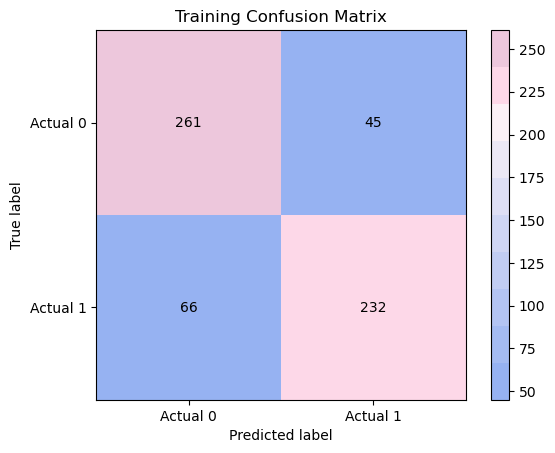

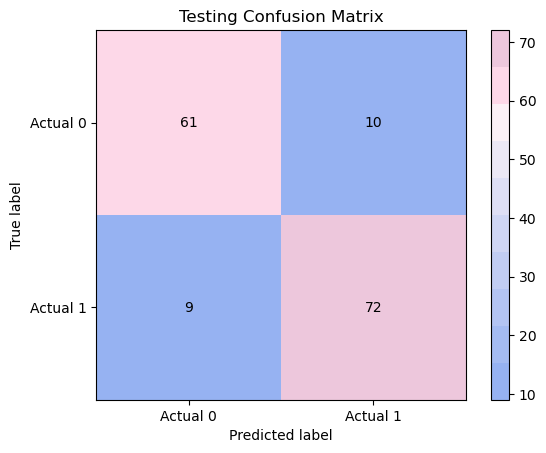

In [45]:
# Initializing the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=1, random_state=3)

# Training the model
rf_model.fit(X_train, y_train)

# Making predictions
train_predictions = rf_model.predict(X_train)
test_predictions = rf_model.predict(X_test)

# Evaluating the model on the training data
train_accuracy = accuracy_score(y_train, train_predictions)
train_conf_matrix = confusion_matrix(y_train, train_predictions)
train_class_report = classification_report(y_train, train_predictions)

# Evaluating the model on the testing data
test_accuracy = accuracy_score(y_test, test_predictions)
test_conf_matrix = confusion_matrix(y_test, test_predictions)
test_class_report = classification_report(y_test, test_predictions)

# Printing the evaluation metrics
print("Training Accuracy  :", train_accuracy)
print("Testing Accuracy   :", test_accuracy)
print("Training Class Report:\n", train_class_report)
print("Testing Class Report:\n", test_class_report)

# Create a custom colormap
cmap = mcolors.ListedColormap(myPalette2)

# Visualizing the training confusion matrix
disp_train = ConfusionMatrixDisplay(confusion_matrix=train_conf_matrix, display_labels=['Actual 0', 'Actual 1'])
# black font in matrices
disp_train.plot(cmap = cmap, text_kw = {'color': 'black'})
plt.title('Training Confusion Matrix')
plt.show()

# Visualizing the testing confusion matrix
disp_test = ConfusionMatrixDisplay(confusion_matrix=test_conf_matrix, display_labels=['Actual 0', 'Actual 1'])
disp_test.plot(cmap = cmap, text_kw = {'color': 'black'})
plt.title('Testing Confusion Matrix')
plt.show()



<h1> Correlation Matrix </h1>

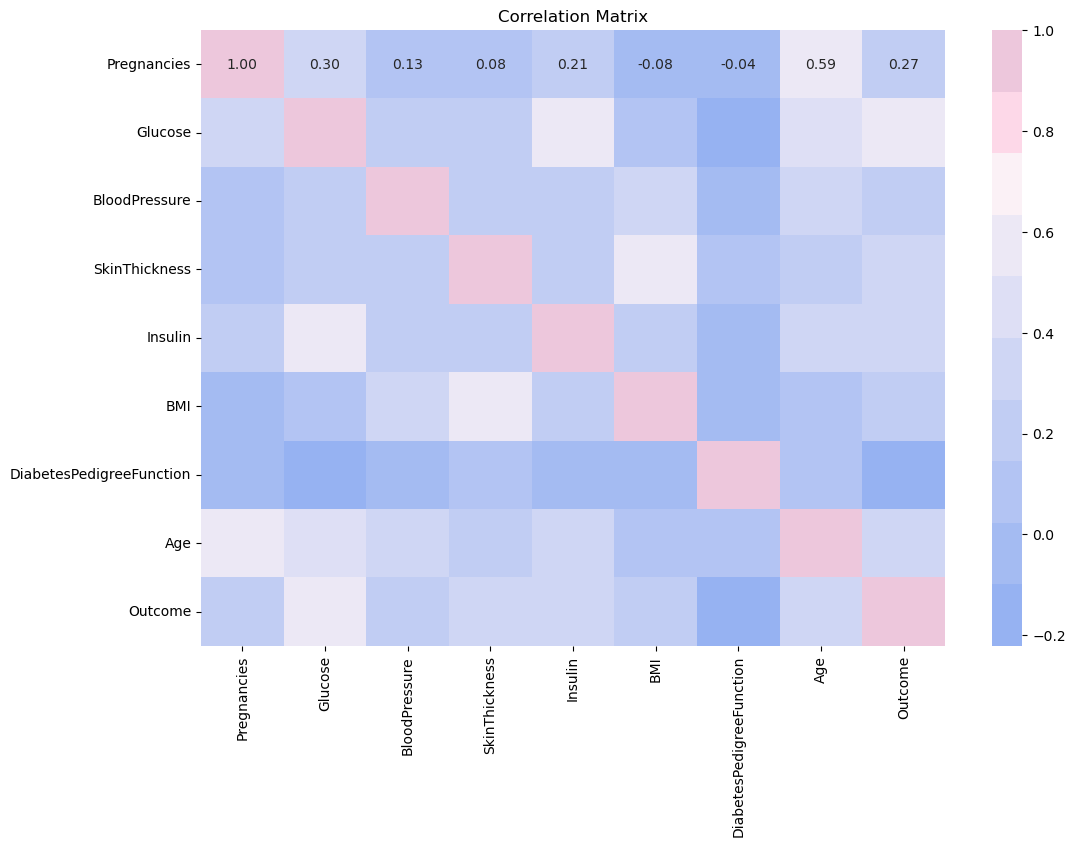

In [46]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the matrix
plt.figure(figsize=(12, 8))

# annot is true, but not working on my end (brit), can figure out once we push to gh
# annot is only true for top row on my (brit) end, works on lia's VSCode
sns.heatmap(correlation_matrix, annot=True, cmap=myPalette2, fmt='0.2f')

plt.title('Correlation Matrix')

# display correlation matrix
plt.show()

<h1> ROC Graph </h1>

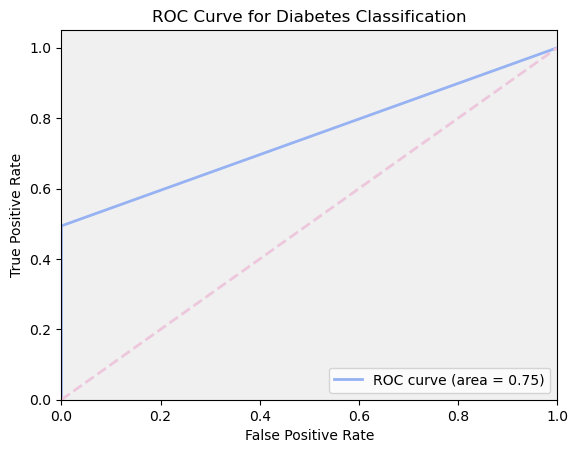

In [47]:
# Make predictions
y_pred_proba = diabetes_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()

#Get the current axes & change bg color
ax = plt.gca()
ax.set_facecolor('#f0f0f0')  

plt.plot(fpr, tpr, color='#96b2f2', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='#edc7dc', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Classification')
plt.legend(loc="lower right")
plt.show()
